In [2]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Converting data file into dataframe

df=pd.read_csv('Automobile_insurance_fraud.csv',parse_dates=['policy_bind_date','incident_date'])
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

Observation:
    1.There are 1000 rows and 40 columns in the dataset.
    2.null values present in _c39.all the values present are null so
    thos feature will be deleted during data cleansing.
    3.in some features there is ? present in place of null values so 
    ? sign has to be changed.
    

In [8]:
#checking missing values

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

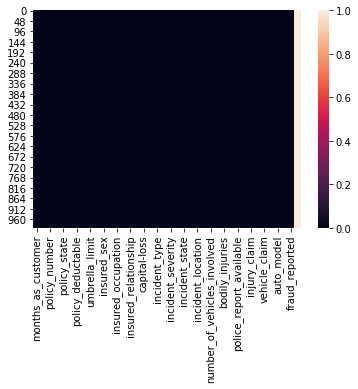

In [9]:
sns.heatmap(df.isnull())

In [10]:
#replacing ? sign with NaN
df=df.replace('?',np.NaN)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Observation:
    NaN values present in four columns. collision_type,property_damage,police_
    report_available and fraud_reported.

In [12]:
df.drop(columns=['_c39'],axis=1,inplace=True)


In [13]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [14]:
#Imputing the NaN values with mode function

for col in ['collision_type','property_damage','police_report_available']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [15]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

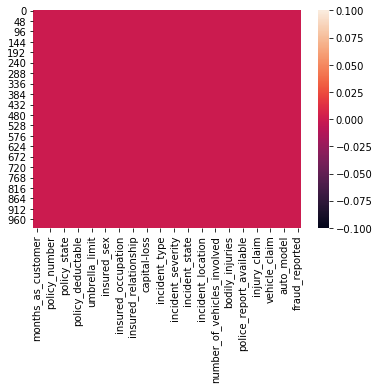

In [16]:
sns.heatmap(df.isnull())


## Statistical Summary

In [17]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Observation:
    1.mean is greater then median in all the features.
    2.capital_loss features has negative values of mean and median
    3.min value in umbrella_limit is negative.
    

In [18]:
#checking correlation

df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


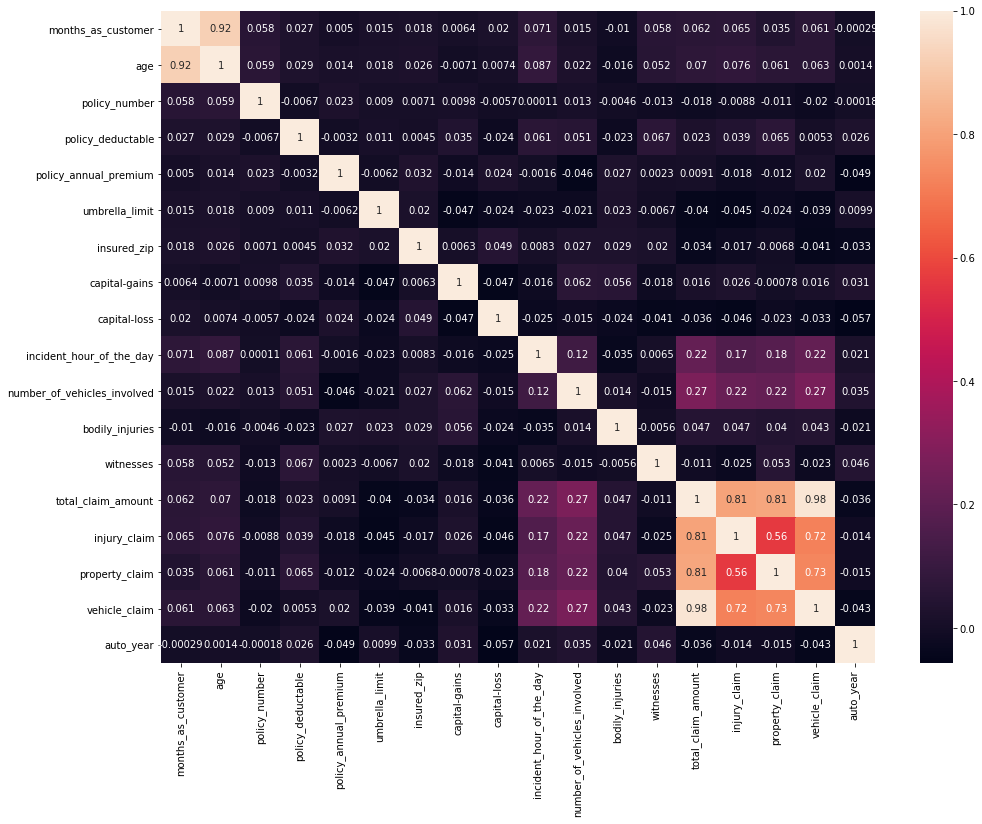

In [19]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

Observation:
    1.months_as_customer and age are highly positively correlated.
    2.total_claim_amount,injury_claim,property_claim and vehicle_claim are 
    also highly positively correlated.
    3.less correlation is present between some of the features.

Skewness of total_claim_amount=-0.59
Skewness of injury_claim=0.26
Skewness of property_claim=0.38
Skewness of vehicle_claim=-0.62


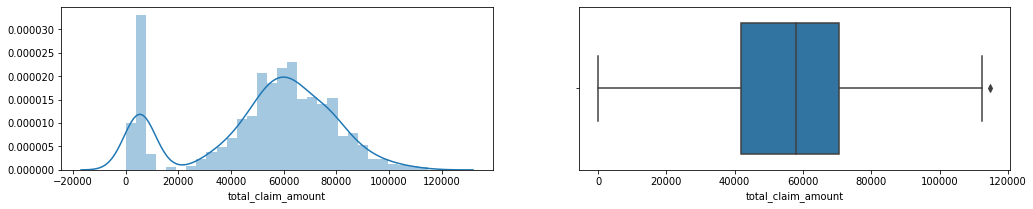

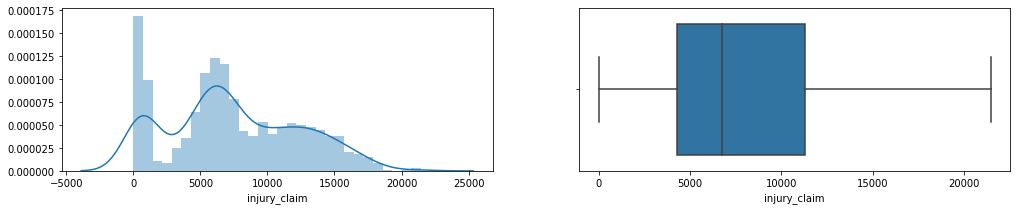

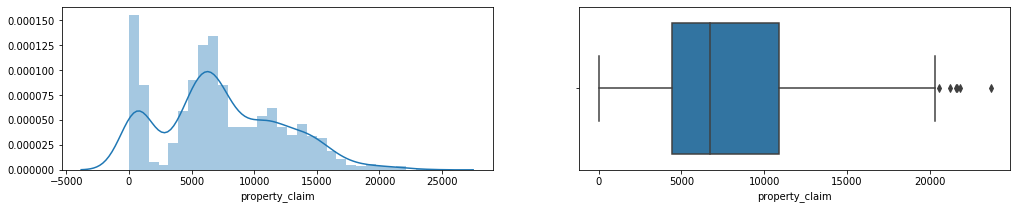

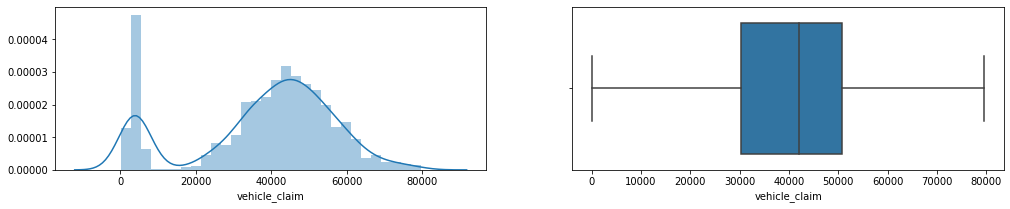

In [20]:
#Univariate analysis

for i in ['total_claim_amount','injury_claim','property_claim','vehicle_claim']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s=%0.2f'%(i,df[i].skew()))
               

Finding:
    outliers found in total_claim_amount and vehicle_claim.
    

Skewness of months_as_customer=0.36
Skewness of age=0.48


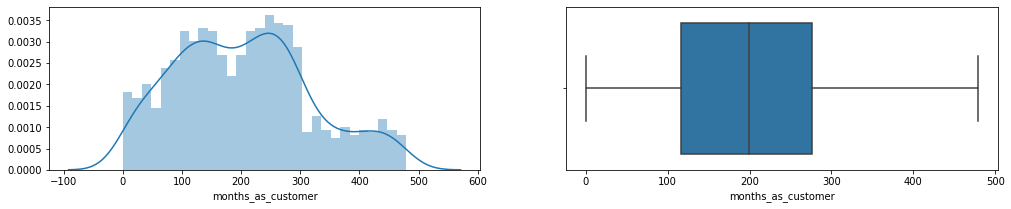

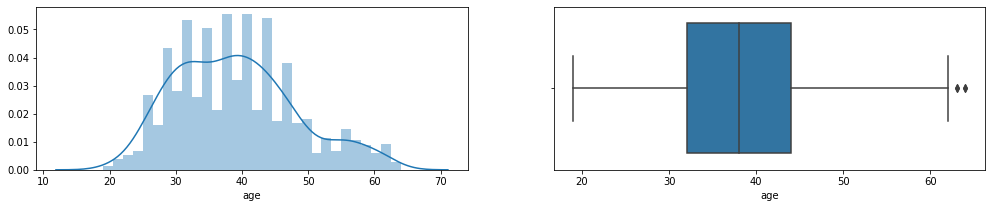

In [21]:
#univariate analyss=is of months_as_customer and age

for i in ['months_as_customer','age']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s=%0.2f'%(i,df[i].skew()))


FindinG:
    no outliers present in months_as_customer and age.

## Exploratory Data Analysis

In [22]:
for i in df.columns:
    print(i)
    print('# of unique values -->',df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('*************************************************************')    

months_as_customer
# of unique values --> 391
count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64
*************************************************************
age
# of unique values --> 46
count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64
*************************************************************
policy_number
# of unique values --> 1000
count      1000.000000
mean     546238.648000
std      257063.005276
min      100804.000000
25%      335980.250000
50%      533135.000000
75%      759099.750000
max      999435.000000
Name: policy_number, dtype: float64
*************************************************************
policy_bind_date
# of unique values --> 951
count                    1000

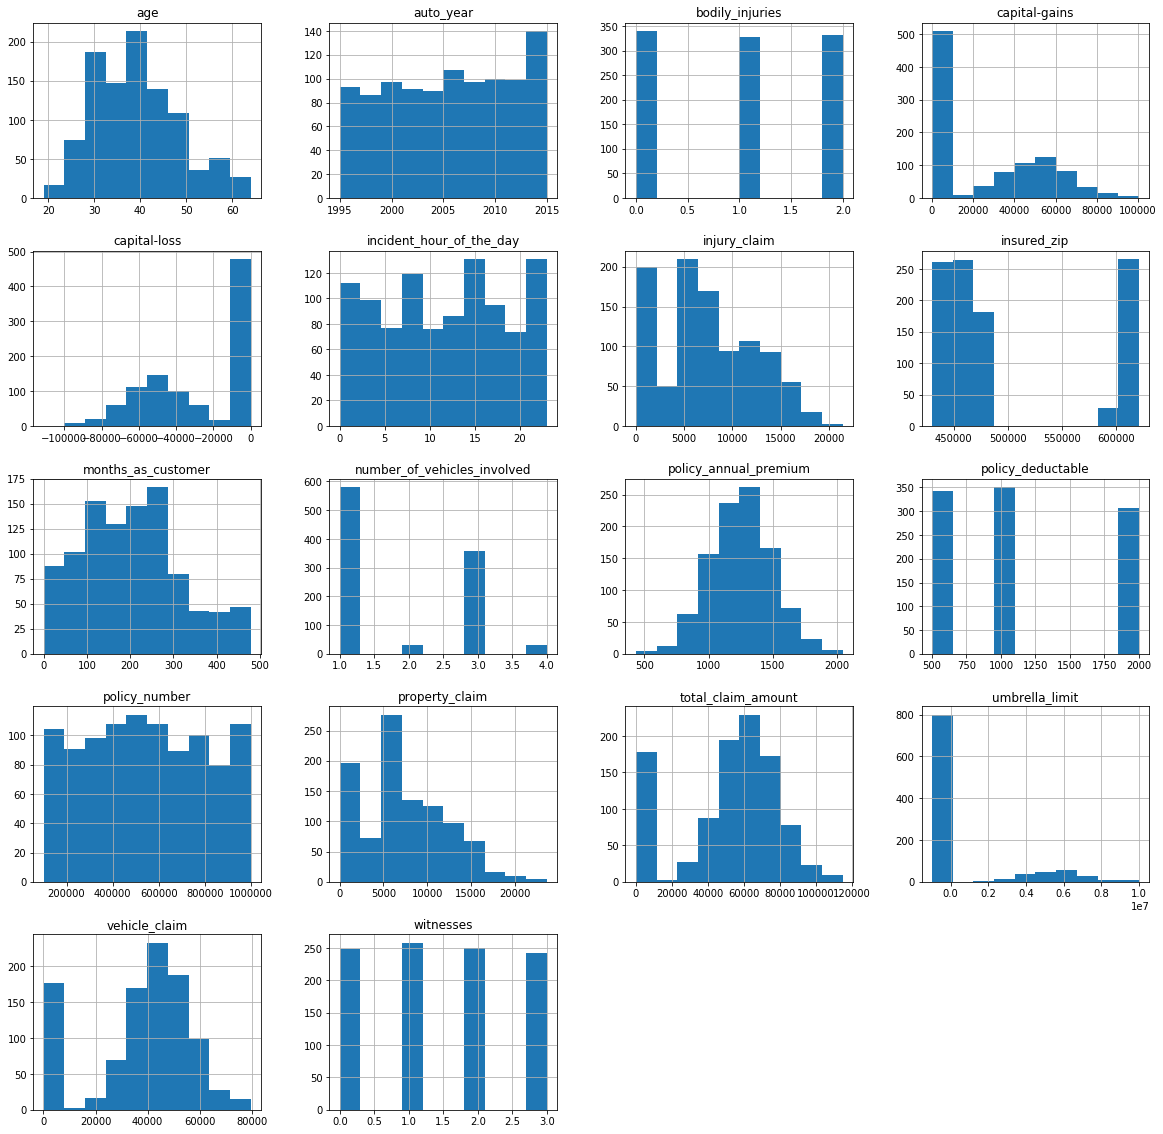

In [23]:
df.hist(figsize=(20,20))
plt.show()

Observation:
    1.Age is normally distributed between 30 - 40.
    2.policy_number is the unique identifier.
    3.few features are constant values throughout the data hence they are 
    redundant.


In [24]:
df.drop(columns=['policy_number','policy_bind_date','policy_annual_premium','insured_zip','incident_location'],axis=1,inplace=True)

In [25]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,0,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,5000000,MALE,MD,machine-op-inspct,reading,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,5000000,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,6000000,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,6000000,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [26]:
df['fraud_reported'].replace({'Y':1,'N':0},inplace=True)

0    753
1    247
Name: fraud_reported, dtype: int64


Text(0.5, 1.0, 'fraud_reported')

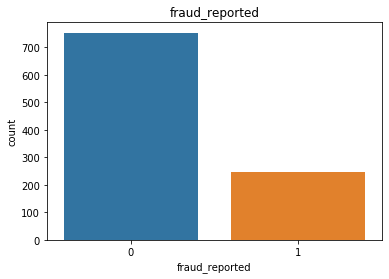

In [27]:
#Target variable is fraud_reported

print(df['fraud_reported'].value_counts())
sns.countplot(df['fraud_reported'])
plt.title('fraud_reported')

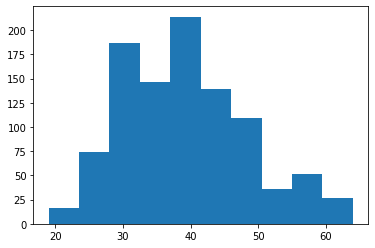

In [28]:
plt.hist(x='age',bins=10,data=df)
plt.show()

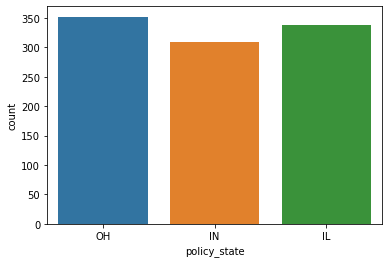

In [29]:
sns.countplot(df['policy_state'])

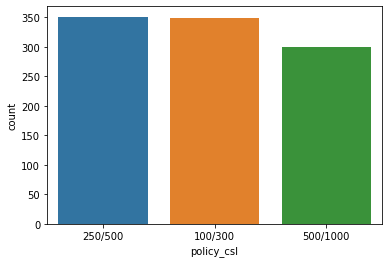

In [30]:
sns.countplot(df['policy_csl'])

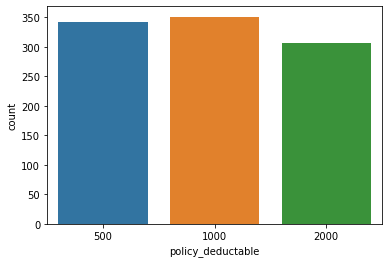

In [31]:
sns.countplot(df['policy_deductable'])

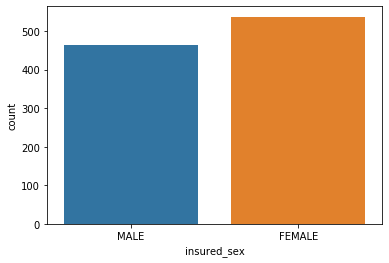

In [32]:
sns.countplot(df['insured_sex'])

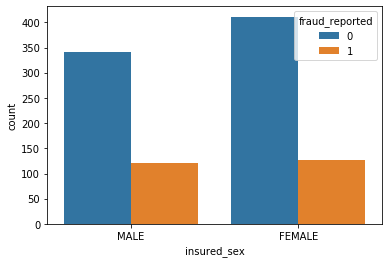

In [33]:
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

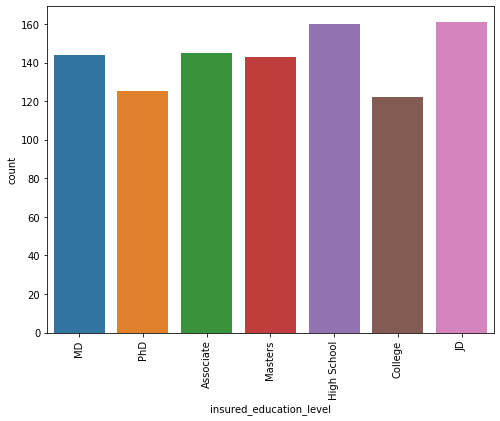

In [34]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(df['insured_education_level'])

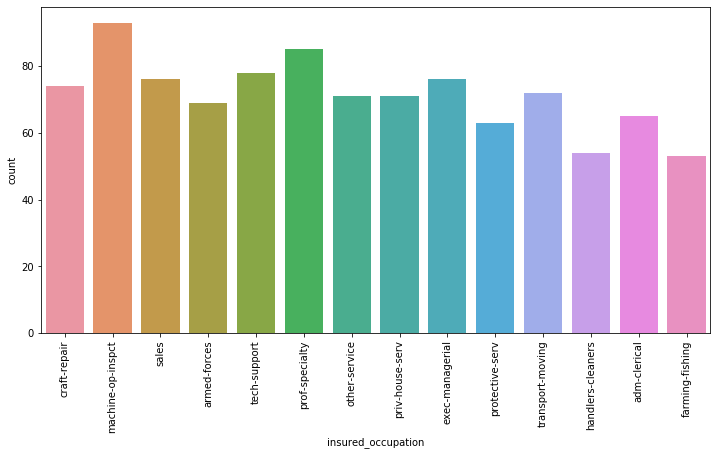

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(df['insured_occupation'])

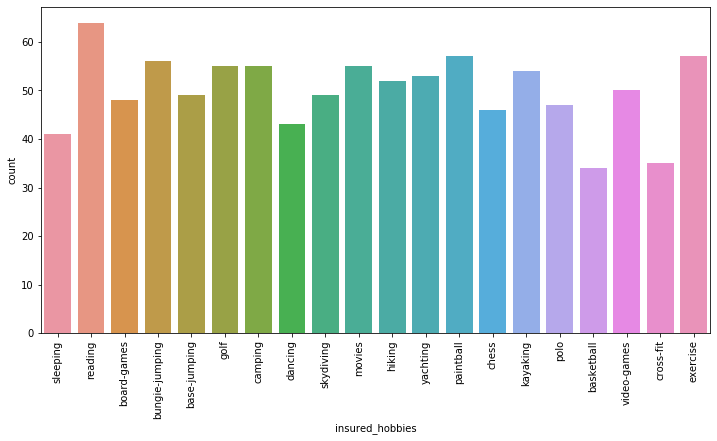

In [36]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(df['insured_hobbies'])

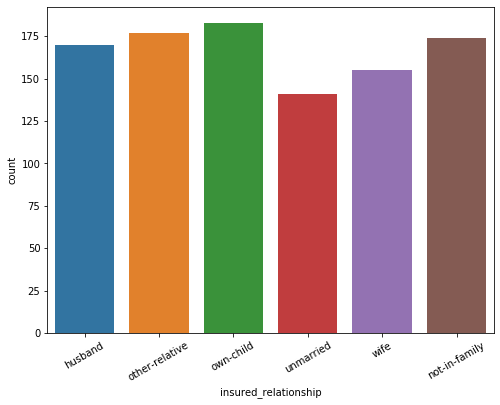

In [37]:
#Data cleansing

plt.figure(figsize=(8,6))
plt.xticks(rotation=30)
sns.countplot(df['insured_relationship'])

In [38]:
df['insured_relationship'].replace({'husband':'Married','wife':'Married','own-child':'Married'},inplace=True)
df['insured_relationship'].value_counts()

Married           508
other-relative    177
not-in-family     174
unmarried         141
Name: insured_relationship, dtype: int64

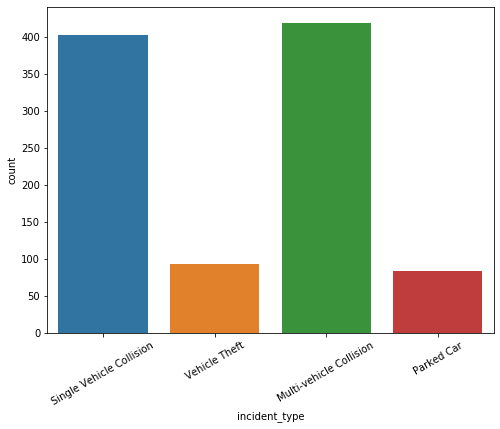

In [39]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=30)
sns.countplot(df['incident_type'])

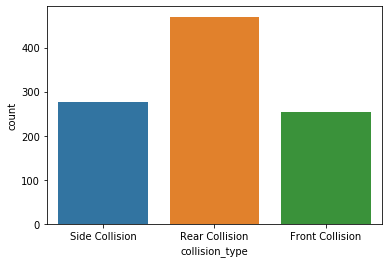

In [40]:
sns.countplot(df['collision_type'])

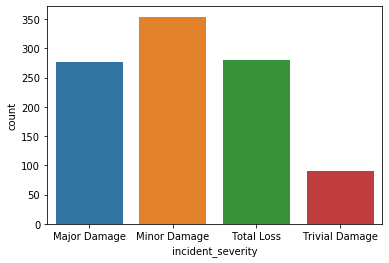

In [41]:
sns.countplot(df['incident_severity'])

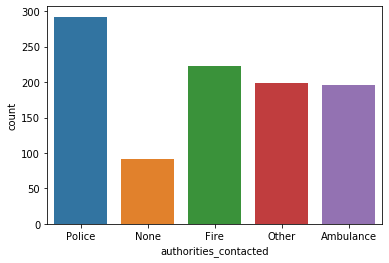

In [42]:
sns.countplot(df['authorities_contacted'])

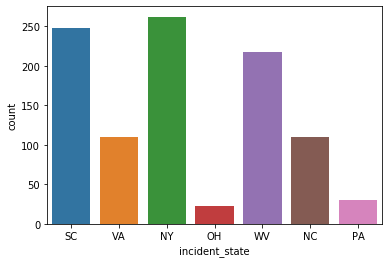

In [43]:
sns.countplot(df['incident_state'])

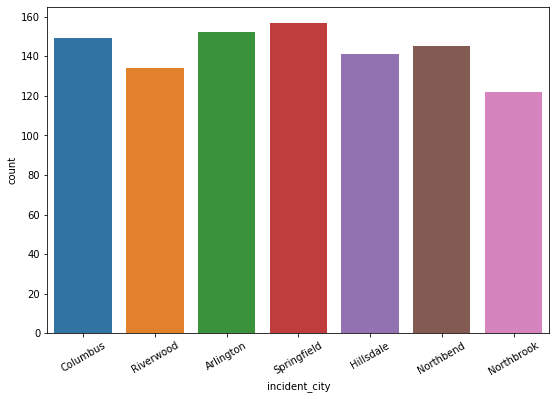

In [44]:
plt.figure(figsize=(9,6))
plt.xticks(rotation=30)
sns.countplot(df['incident_city'])

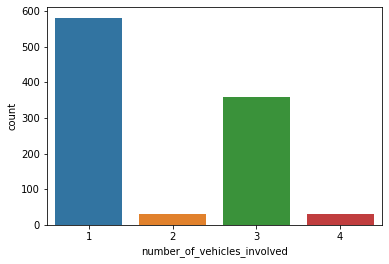

In [45]:
sns.countplot(df['number_of_vehicles_involved'])

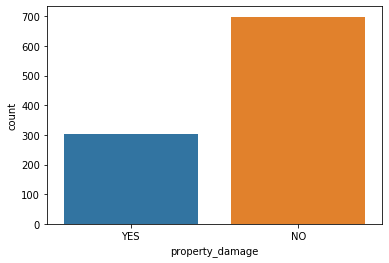

In [46]:
sns.countplot(df['property_damage'])

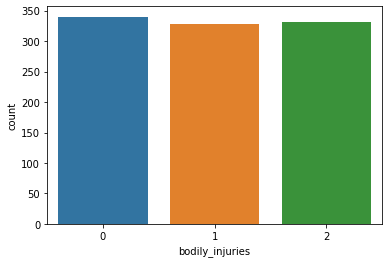

In [47]:
sns.countplot(df['bodily_injuries'])

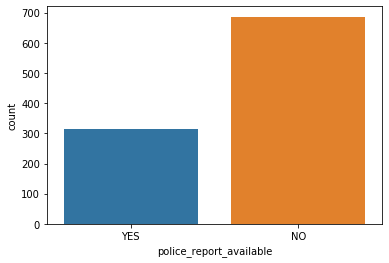

In [48]:
sns.countplot(df['police_report_available'])

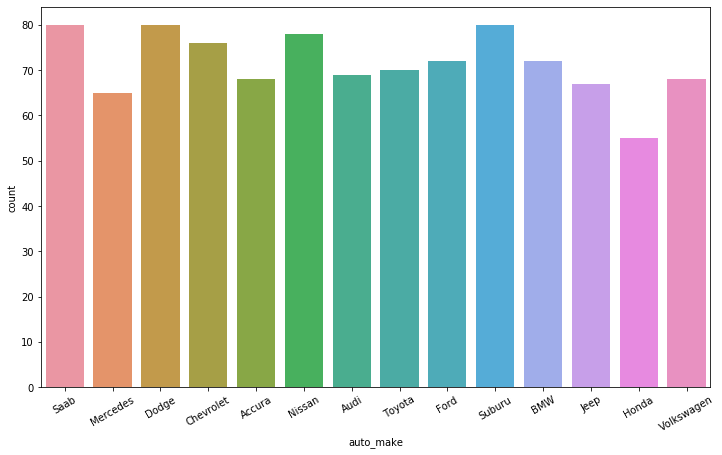

In [49]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=30)
sns.countplot(df['auto_make'])

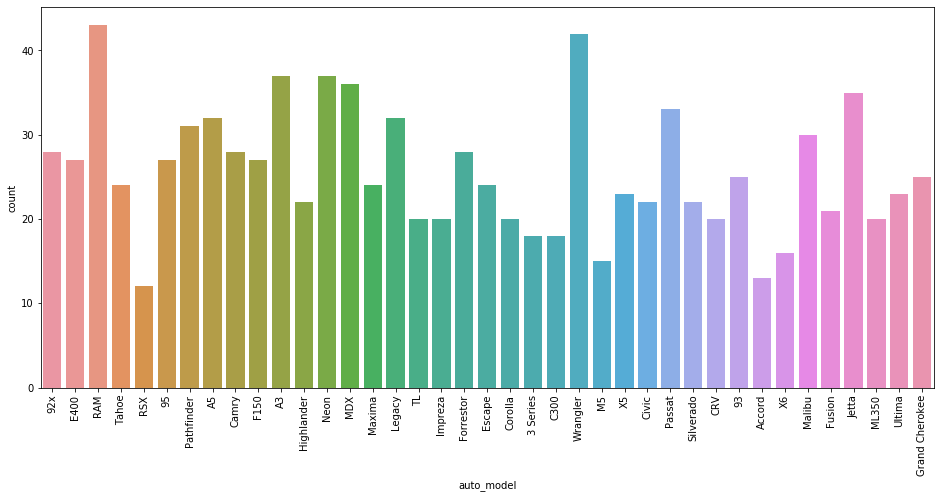

In [50]:
#auto_model analysis

plt.figure(figsize=(16,7))
plt.xticks(rotation=90)
sns.countplot(df['auto_model'])

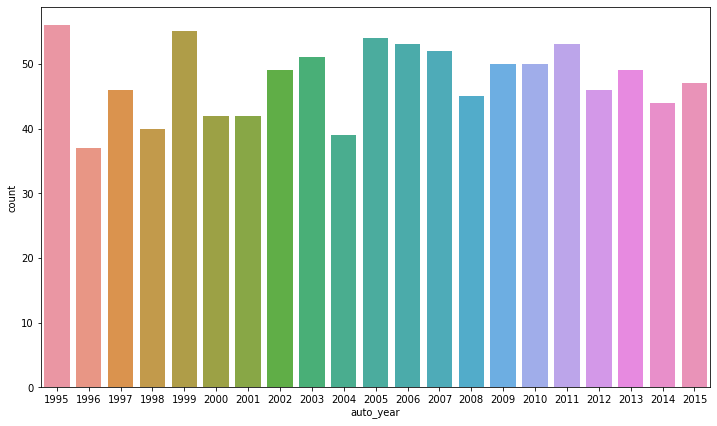

In [51]:
#model_year analysis

plt.figure(figsize=(12,7))
sns.countplot(df['auto_year'])

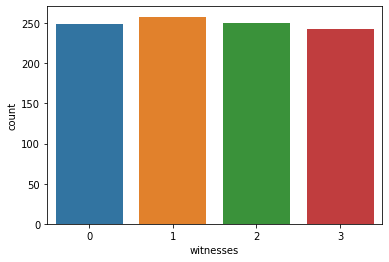

In [52]:
# witness analysis

sns.countplot(df['witnesses'])

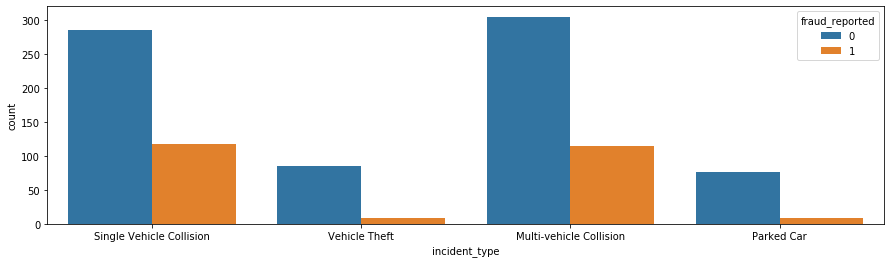

In [53]:
plt.figure(figsize=(15,4))
sns.countplot(x='incident_type',data=df,hue='fraud_reported')

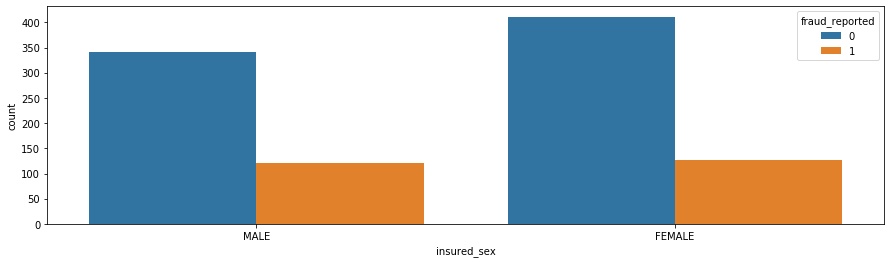

In [54]:
plt.figure(figsize=(15,4))
sns.countplot(x='insured_sex',data=df,hue='fraud_reported')

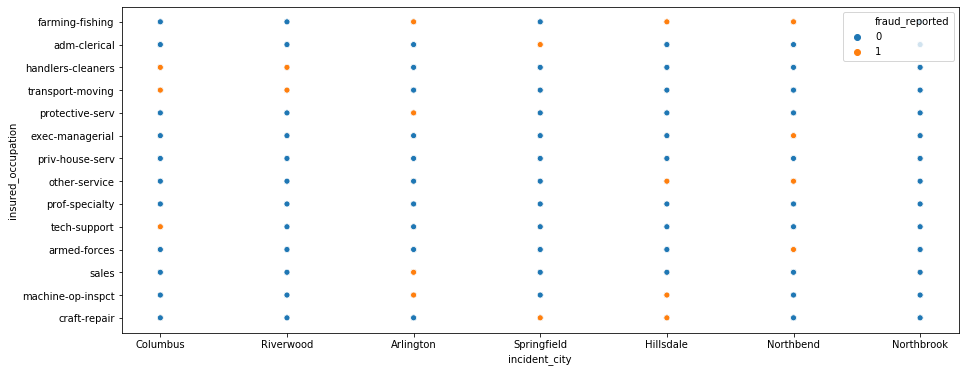

In [55]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='incident_city',y='insured_occupation',hue='fraud_reported',data=df)

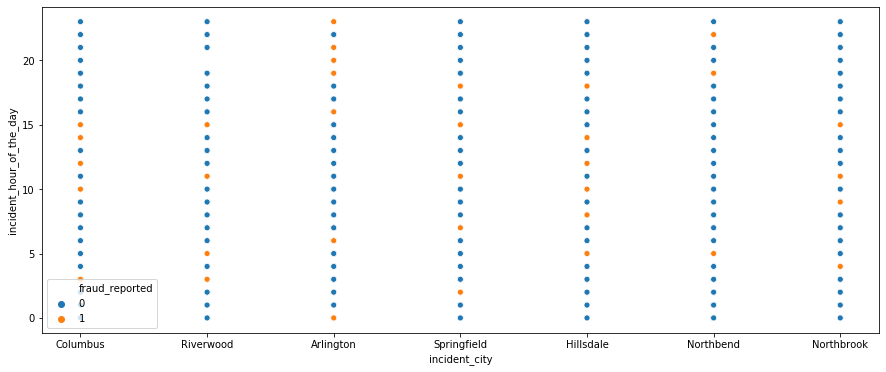

In [56]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='incident_city',y='incident_hour_of_the_day',hue='fraud_reported',data=df)

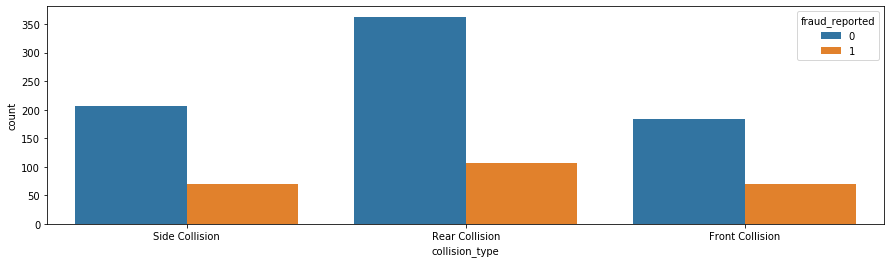

In [57]:
plt.figure(figsize=(15,4))
sns.countplot(x='collision_type',data=df,hue='fraud_reported')

Text(0, 0.5, '% of reports')

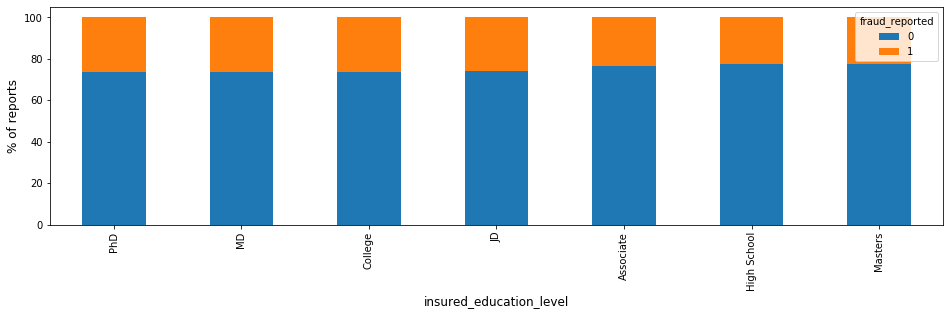

In [59]:
tbl=pd.crosstab(df['insured_education_level'],df['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('insured_education_level',fontsize=12)
plt.ylabel('% of reports',fontsize=12)

Text(0, 0.5, '% of reports')

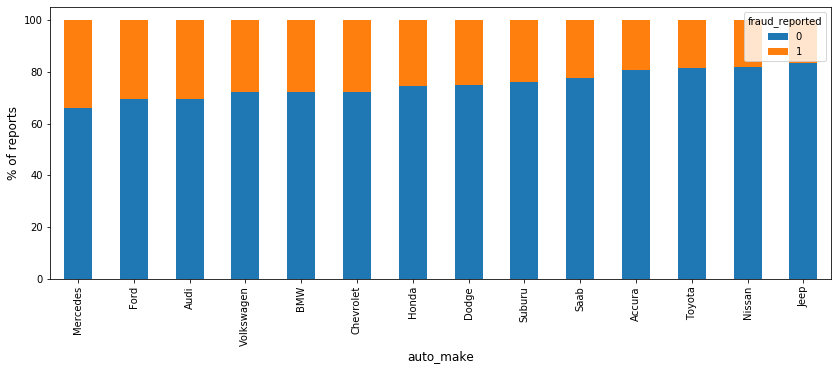

In [60]:
tbl=pd.crosstab(df['auto_make'],df['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('auto_make',fontsize=12)
plt.ylabel('% of reports',fontsize=12)
                                                            
               

Text(0, 0.5, '% of reports')

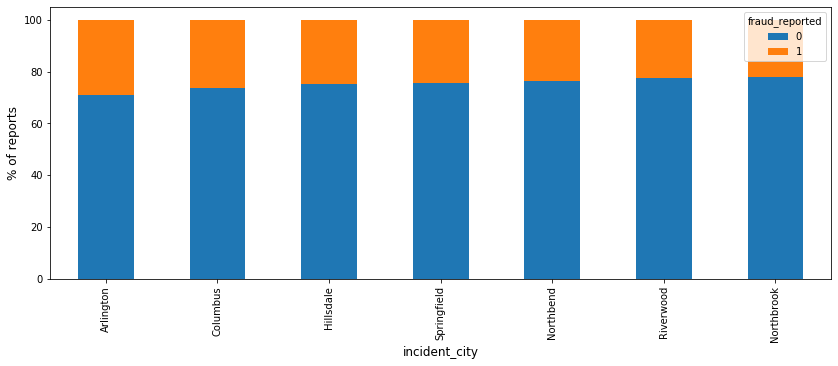

In [61]:
tbl=pd.crosstab(df['incident_city'],df['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('incident_city',fontsize=12)
plt.ylabel('% of reports',fontsize=12)

Text(0, 0.5, '% of reports')

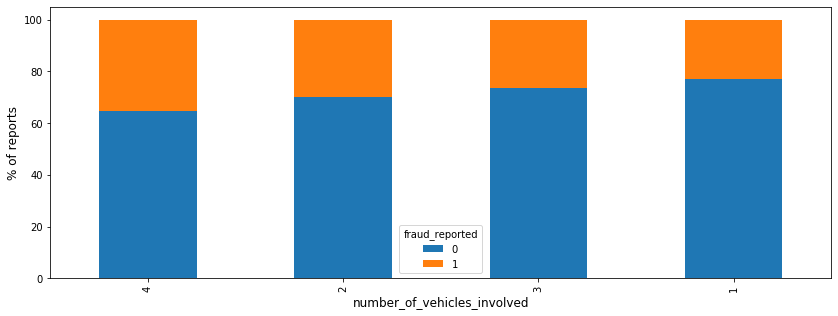

In [63]:
tbl=pd.crosstab(df['number_of_vehicles_involved'],df['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('number_of_vehicles_involved',fontsize=12)
plt.ylabel('% of reports',fontsize=12)

### Checking Skewness

In [64]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

In [65]:
df.drop(columns=['incident_date'],axis=1,inplace=True)

In [66]:
#Separating the categorical data and numerical data

cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df>>> \n',cat_df,'\nnum_df>>>\n',num_df)
    

cat_df>>> 
 ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model'] 
num_df>>>
 ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported']


## Removing Outliers 

In [67]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_df]))
z

array([[1.07813958, 0.99083647, 0.22238259, ..., 0.74965272, 0.1834404 ,
        1.74601919],
       [0.2089946 , 0.33407345, 1.41278352, ..., 1.82334593, 0.31549088,
        1.74601919],
       [0.60800168, 1.08891308, 1.41278352, ..., 0.78556451, 0.31549088,
        0.57273139],
       ...,
       [0.64276748, 0.54161057, 1.03996564, ..., 0.77190224, 1.5139238 ,
        0.57273139],
       [2.20802805, 2.52328351, 1.41278352, ..., 0.07357971, 1.18130295,
        0.57273139],
       [2.19064515, 2.3043625 , 0.22238259, ..., 1.81434017, 0.31549088,
        0.57273139]])

In [68]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 500, 503, 657, 700,
       807, 875, 922, 975], dtype=int64), array([ 3,  3,  3,  3,  3,  3,  3,  3,  3, 12,  3,  3,  3,  5,  3,  3,  3],
      dtype=int64))


In [69]:
df=df[(z<3).all(axis=1)]

In [70]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,0,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,IN,250/500,2000,5000000,MALE,MD,machine-op-inspct,reading,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,OH,100/300,2000,5000000,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,IL,250/500,2000,6000000,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,IL,500/1000,1000,6000000,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,0,FEMALE,Masters,craft-repair,paintball,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,IL,100/300,1000,0,FEMALE,PhD,prof-specialty,sleeping,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,OH,250/500,500,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,IL,500/1000,2000,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,0


In [71]:
#Transforming categorical data using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=le.fit_transform(df[column])

In [72]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,297,29,2,1,1,1,1,4,2,17,...,2,1,559,257,510,541,10,1,9,1
1,211,23,1,1,2,5,1,4,6,15,...,0,0,44,46,45,38,8,12,12,1
2,122,10,2,0,2,5,0,6,11,2,...,3,0,142,335,103,115,4,30,12,0
3,237,22,0,1,2,6,0,6,1,2,...,2,0,449,244,247,518,3,34,19,1
4,211,25,0,2,1,6,1,0,11,2,...,1,0,81,69,36,66,0,31,14,0


In [73]:
#Splitting the data into input and output variables

x=df.drop(columns=['fraud_reported'])
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,297,29,2,1,1,1,1,4,2,17,...,1,2,1,559,257,510,541,10,1,9
1,211,23,1,1,2,5,1,4,6,15,...,0,0,0,44,46,45,38,8,12,12
2,122,10,2,0,2,5,0,6,11,2,...,2,3,0,142,335,103,115,4,30,12
3,237,22,0,1,2,6,0,6,1,2,...,1,2,0,449,244,247,518,3,34,19
4,211,25,0,2,1,6,1,0,11,2,...,0,1,0,81,69,36,66,0,31,14


In [74]:
y=df['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [75]:
print(x.shape,'\t\t',y.shape)

(983, 32) 		 (983,)


In [76]:
#Using Standard scaler

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x=ss.fit_transform(x)

## Machine Learning Algorithm

In [77]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [78]:
print(x_train.shape,'\t\t',x_test.shape)

(786, 32) 		 (197, 32)


In [80]:
print(y_train.shape,'\t\t',y_test.shape)

(786,) 		 (197,)


In [81]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [82]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
neighbors={'n_neighbors':range(1,30)}
bknn=GridSearchCV(knn,neighbors)
bknn.fit(x_train,y_train)
bknn.best_params_

{'n_neighbors': 14}

In [83]:
KNN=KNeighborsClassifier(n_neighbors=14)

In [87]:
#Support Vector Classifier

from sklearn.svm import SVC

svc=SVC()
parameters={'kernel':['linear','sigmoid','rbf','poly'],'C':[1,10]}
bsvc=GridSearchCV(svc,parameters)
bsvc.fit(x_train,y_train)
bsvc.best_params_

{'C': 1, 'kernel': 'linear'}

In [88]:
SV=SVC(kernel='linear',C=1)

In [89]:
#DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy']}
bdtc=GridSearchCV(dtc,parameters)
bdtc.fit(x_train,y_train)
bdtc.best_params_

{'criterion': 'gini'}

In [90]:
DTC=DecisionTreeClassifier(criterion='gini',random_state=42)

In [91]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
parameters={'n_estimators':range(50,100,150)}
brfc=GridSearchCV(rfc,parameters)
brfc.fit(x_train,y_train)
brfc.best_params_

{'n_estimators': 50}

In [92]:
RFC=RandomForestClassifier(n_estimators=50,random_state=42)

In [93]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier(n_estimators=250)


In [95]:
#ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

ETC=ExtraTreesClassifier(n_estimators=250)

In [96]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

ABC=AdaBoostClassifier(n_estimators=50)

In [97]:
#Bagging Classifier

from sklearn.ensemble import BaggingClassifier

BC=BaggingClassifier(n_estimators=250)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


LR=LogisticRegression()
GNB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=14)
SV=SVC(kernel='linear',C=1)
DTC=DecisionTreeClassifier(criterion='gini',random_state=42)
RFC=RandomForestClassifier(n_estimators=50,random_state=42)
GBC=GradientBoostingClassifier(n_estimators=250)
ETC=ExtraTreesClassifier(n_estimators=250)
ABC=AdaBoostClassifier(n_estimators=50)
BC=BaggingClassifier(n_estimators=250)

In [99]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DTC))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))
models.append(('BaggingClassifier',BC))

In [100]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

***************** LogisticRegression *********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score= 0.7766497461928934


Cross val score= 0.7730983302411873


roc_auc_score= 0.6334591722595079


classification report:               precision    recall  f1-score   support

           0       0.81      0.91      0.86       149
           1       0.57      0.35      0.44        48

    accuracy                           0.78       197
   macro avg       0.69      0.63      0.65       197
weighted avg       0.75      0.78      0.76       197



[[136  13]
 [ 31  17]]





***************** GaussianNB *********************


GaussianNB(priors=None, var_smoothing=1e-09)


accuracy score= 0.75

Cross val score= 0.8383219954648526


roc_auc_score= 0.8145973154362416


classification report:               precision    recall  f1-score   support

           0       0.92      0.88      0.90       149
           1       0.67      0.75      0.71        48

    accuracy                           0.85       197
   macro avg       0.79      0.81      0.80       197
weighted avg       0.86      0.85      0.85       197



[[131  18]
 [ 12  36]]







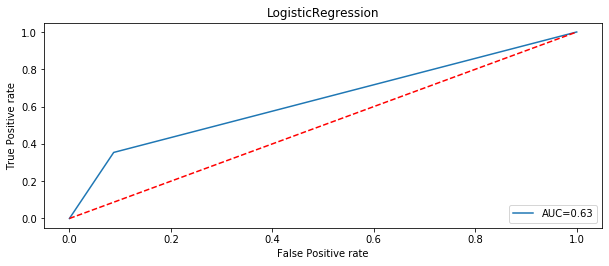

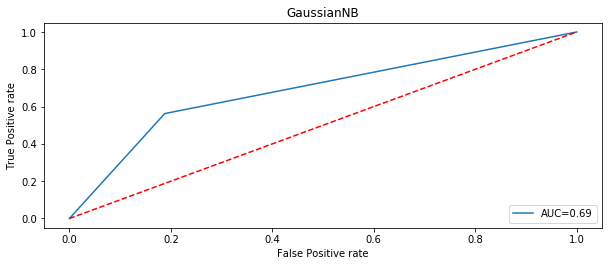

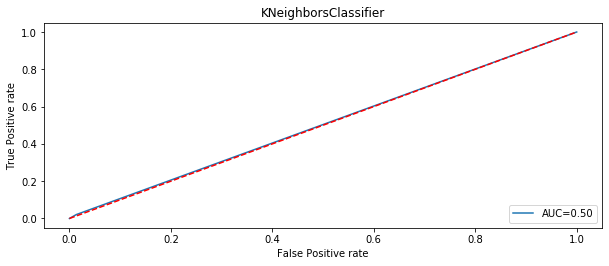

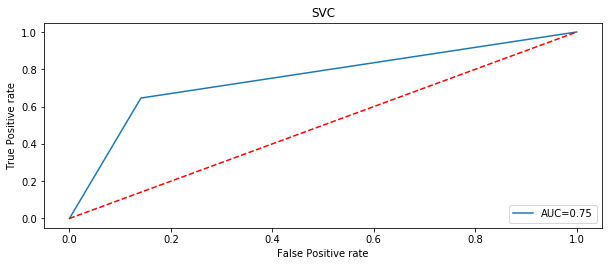

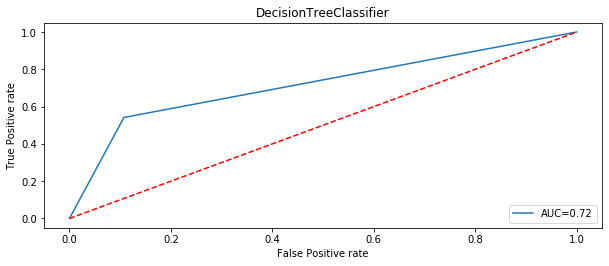

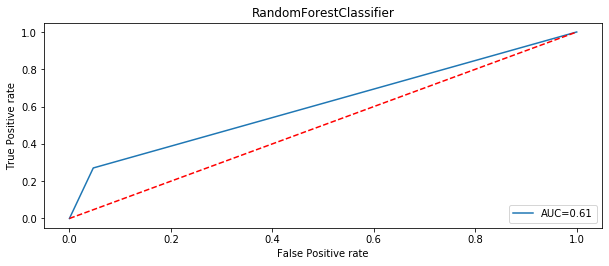

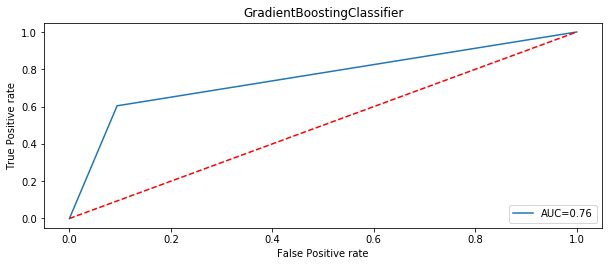

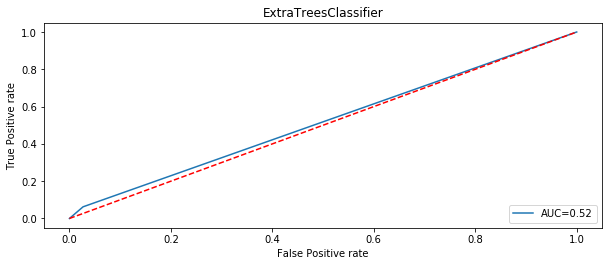

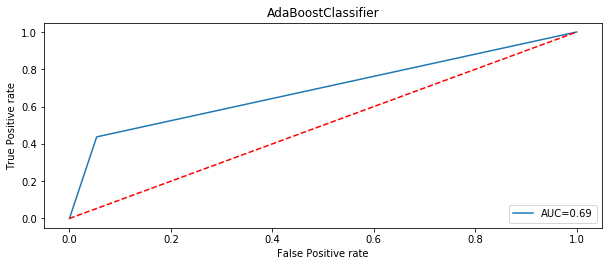

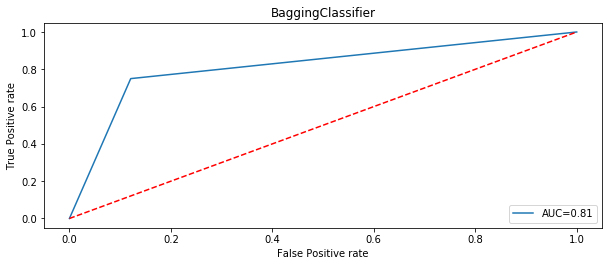

In [101]:
Model=[]
score=[]
CVS=[]
rocscore=[]

for name,model in models:
    print('*****************',name,'*********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('accuracy score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross val score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report:',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive rate')
    plt.xlabel('False Positive rate')
    print('\n\n')

In [104]:
final=pd.DataFrame({'Model':Model,'Accuracy_score':score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
final

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,77.664975,77.309833,63.345917
1,GaussianNB,75.126904,74.157906,68.729027
2,KNeighborsClassifier,75.126904,75.176252,50.370526
3,SVC,80.710660,79.146568,75.244687
4,DecisionTreeClassifier,80.710660,77.725211,71.714206
5,RandomForestClassifier,78.680203,77.116059,61.192673
6,GradientBoostingClassifier,83.248731,82.205731,75.510347
7,ExtraTreesClassifier,75.126904,75.687487,51.782718
8,AdaBoostClassifier,82.233503,81.587302,69.190436
9,BaggingClassifier,84.771574,83.832200,81.459732


Conclusion:
    Bagging Classifier gives the highest accuracy score.

In [105]:
#saving the model

import joblib
from joblib import dump

joblib.dump(BC,'BC_Automobile_insurance_fraud.pkl')

['BC_Automobile_insurance_fraud.pkl']

In [106]:
#saving csv file

df=pd.DataFrame(final)
df.to_csv('BC_Automobile_insurance_fraud_prediction.csv')